In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,root_mean_squared_error #model evaluation

#R^2 = 1−Total Variation in Data/ Sum of Squared Errors
#MAE = 1/n * ∑∣yactual−ypredicted∣ (Average size of errors, without direction)
#MSE=1/n * ∑(yactual−ypredicted)2 (Squared errors - penalizes big mistakes more heavily)
#RMSE= sqrt(MSE) -Same as MSE but takes square root to bring back into Rupees.

df = pd.read_csv("Cardekho.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [33]:
q1 = np.quantile(df['selling_price'], 0.25)
q3 = np.quantile(df["selling_price"],0.75)
print(q1, q3)

385000.0 825000.0


In [45]:
mx = df["selling_price"].idxmax()
print(df.loc[mx])

Unnamed: 0                        4845
car_name             Ferrari GTC4Lusso
brand                          Ferrari
model                        GTC4Lusso
vehicle_age                          2
km_driven                         3800
seller_type                     Dealer
fuel_type                       Petrol
transmission_type            Automatic
mileage                            4.0
engine                            3855
max_power                        601.0
seats                                4
selling_price                 39500000
Name: 3799, dtype: object


In [46]:
lw = q1 - 1.5*(q3-q1)
uw = q3 + 1.5*(q3-q1)
print(lw, uw)

-275000.0 1485000.0


In [47]:
df = df.loc[(df["selling_price"] <= uw) & (df["selling_price"] >= lw)]
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


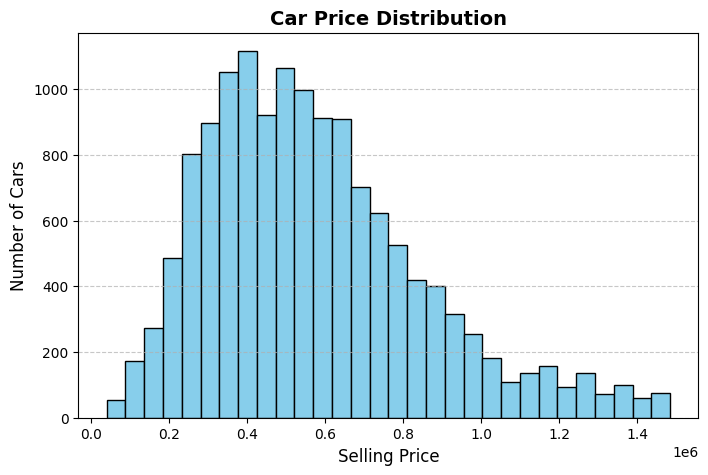

In [48]:
plt.figure(figsize=(8,5))
plt.hist(df["selling_price"], bins=30, color="skyblue", edgecolor="black")
plt.title("Car Price Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Selling Price", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

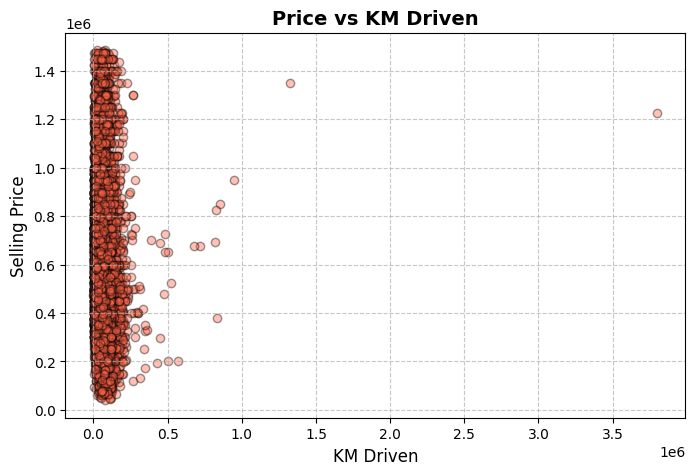

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(df["km_driven"], df["selling_price"], alpha=0.4, color="tomato", edgecolors="k")
plt.title("Price vs KM Driven", fontsize=14, fontweight="bold")
plt.xlabel("KM Driven", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


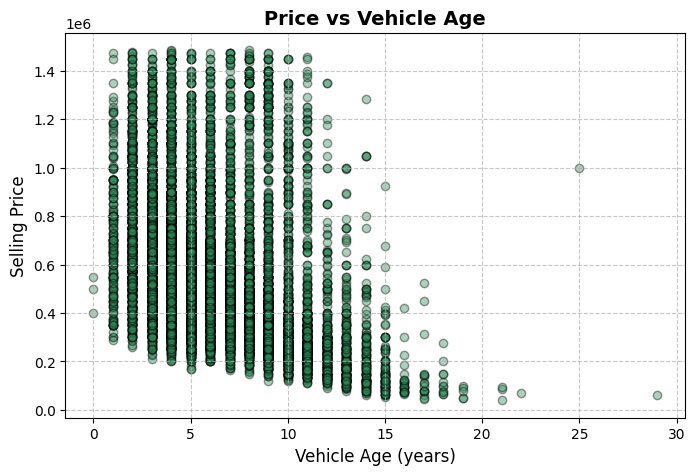

In [50]:

plt.figure(figsize=(8,5))
plt.scatter(df["vehicle_age"], df["selling_price"], alpha=0.4, color="seagreen", edgecolors="k")
plt.title("Price vs Vehicle Age", fontsize=14, fontweight="bold")
plt.xlabel("Vehicle Age (years)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


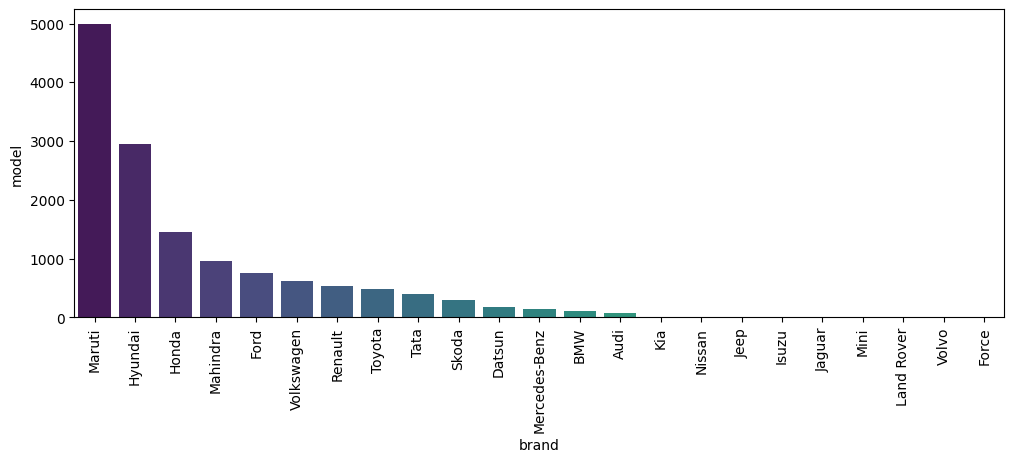

In [51]:
plt.figure(figsize = (12,4))
gb = df.groupby("brand").agg({"model":"count"})
gb = gb.sort_values(by = "model", axis = 0, ascending = False)
sns.barplot(x = gb.index, y = gb["model"], hue = gb.index, palette = "viridis")
plt.xticks(rotation = 90)
plt.show()

In [52]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [53]:
X = df[['vehicle_age', 'km_driven', 'mileage', 'engine','max_power', 'seats']]
y = df["selling_price"]

In [54]:
X = X.dropna()
y = y[X.index]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [56]:
y_test

7417      185000
1116      220000
2548      349000
14144     710000
10582     200000
          ...   
8700      219000
14094    1175000
7372      400000
9307      325000
3721      841000
Name: selling_price, Length: 2805, dtype: int64

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [59]:
print("R² Score:", r2_score(y_test, y_pred)) 
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE", root_mean_squared_error(y_test, y_pred))

R² Score: 0.7118346424665634
MAE: 112037.96150484595
MSE: 22265749477.348682
RMSE 149217.1219309255


In [60]:
example = [[3,80000,15, 1200, 75, 5]]  # age, km_driven, mileage, engine, max_power, seats
predicted_price = model.predict(example)
print("Predicted Price:", predicted_price)

Predicted Price: [588864.27069997]


C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


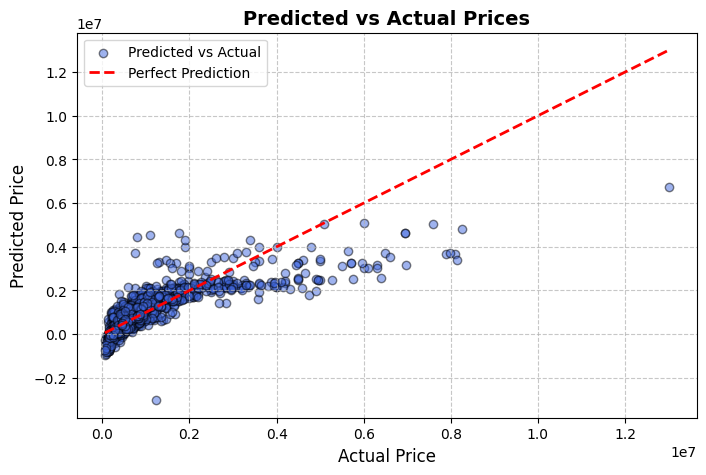

In [29]:
# --- Plot Predicted vs Actual ---
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="royalblue", edgecolors="k", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("Predicted vs Actual Prices", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


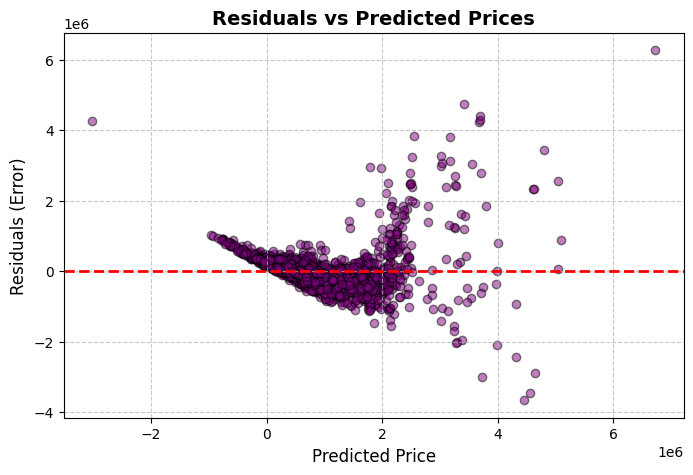

In [30]:
# --- Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple", edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Residuals (Error)", fontsize=12)
plt.title("Residuals vs Predicted Prices", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


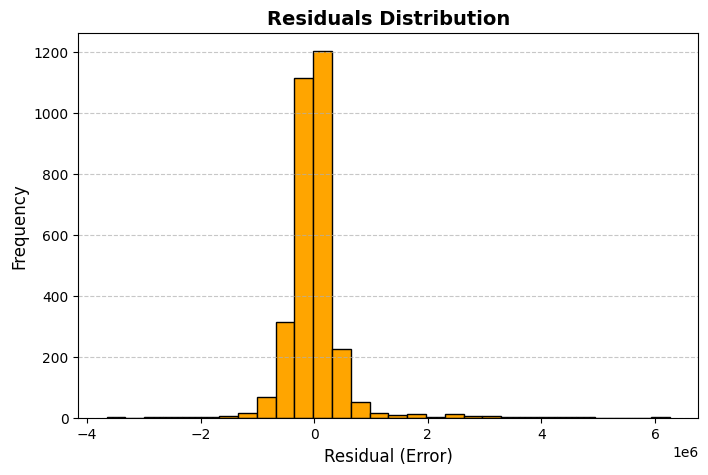

In [31]:
# --- Residuals Histogram ---
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color="orange", edgecolor="black")
plt.title("Residuals Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Residual (Error)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()